<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Examen%201er%20parcial/Problema1_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 16**
Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo $[0, 30]$.

Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo $10$.

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $X_1:=$ Tiempo en el que llega la persona $1$ al lugar de la cita.
2.   $X_2:=$ Tiempo en el que llega la persona $2$ al lugar de la cita.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema y la naturaleza meramente aleatoria y equiprobable del mismo, se sigue que las dos variables poseen una distribución uniforme $\,\mathrm{U}(0, 30)$.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de cada variable aleatoria, se sigue que

  \begin{align}
  X_1 &\sim \mathrm{U}(0, 30) \\
  X_2 &\sim \mathrm{U}(0, 30)
  \end{align}

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

La diferencia absoluta $\,|X_1 - X_2|\,$ modela adecuadamente el sistema.

Si $\,|X_1 - X_2|\,$ es menor que la cota superior propuesta en el problema, es decir, $10$; se considerará como una observación exitosa y viceversa.

### **Objetivo:**

Entonces se determinará la frecuencia con la que ocurre

  \begin{align}
  |X_1 - X_2| \leq 10
  \end{align}

para obtener una estimación de la probabilidad de que el tiempo que alguna de las dos personas espere a la otra sea como máximo $10$.

Por lo tanto, implementamos el siguiente código:

In [113]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [114]:
def observacion():              # Función que devuelve 1 si |X1 - X2| <= 10 o 0 si caso contrario.
  X1 = random.uniform(0, 30)     # Generamos variables aleatorias X1 y X2 según su distribución especificada anteriormente.
  X2 = random.uniform(0, 30)  
  if abs(X1 - X2) <= 10:         # Aquí se analiza la condición a estudiar |X1 - X2| <= 10.
    obs = 1
  else:
    obs = 0
  return obs

In [115]:
observacion()

1

## **5. Diseñe el experimento.**

Para estimar la probabilidad de que ocurra $\,|X_1 - X_2|\leq 10\,$, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa la probabilidad deseada a estimar.

In [116]:
def experimento(n):                # Función que devuelve lista "evol_prob" con los valores de la probabilidad estimada, la cual se
  evol_prob = []                   #calcula contando las veces que se cumple la condición planteada en el objetivo de la simulación y
  obs = 0                          #dividir esta cantidad entre las veces que se ha repetido la observación del sistema. Todo esto
  for i in range(n):               #mientras aumenta el número de observaciones hasta llegar a "n".
    obs += observacion()
    evol_prob.append(obs/(i+1))
  return evol_prob

In [117]:
evol_prob = experimento(3000)    # Realizamos un experimento con tamaño de muestra grande y arbitraria.

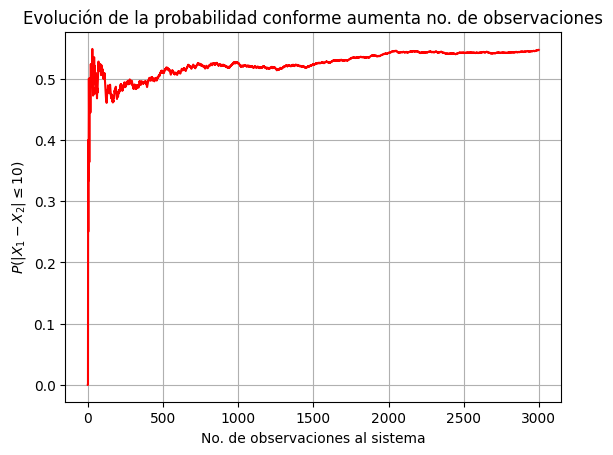

In [118]:
plt.plot(evol_prob, 'r')                         # La gráfica muestra que la convergencia está garantizada con 1500 iteraciones.
plt.xlabel('No. de observaciones al sistema')    
plt.ylabel('$P(|X_1 - X_2|\leq 10)$')
plt.grid(True)
plt.title('Evolución de la probabilidad conforme aumenta no. de observaciones')
plt.show()

In [119]:
n = 1500    # Definiendo tamaño de muestra "n" para cada experimento a simular.

In [120]:
print('mu =', np.mean(evol_prob), ', sigma =', np.std(evol_prob))

mu = 0.5240615088106462 , sigma = 0.024468551591340846


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [121]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error de la probabilidad estimada.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [122]:
N = int(np.ceil((2*np.std(evol_prob)*norm.ppf(1-alpha/2)/epsilon)**2))  # Cálculo del número necesario de simulaciones del experimento
print(N)

92


In [123]:
def simulacion(N):                     # Función que devuelve una lista con las probabilidades estimadas promedio de los N
  prob = []                            #experimentos realizados.
  for i in range(N):
    evol_prob = experimento(n)
    prob.append(np.mean(evol_prob))
  return prob

In [124]:
prob = simulacion(N)    # Realizamos la simulación.

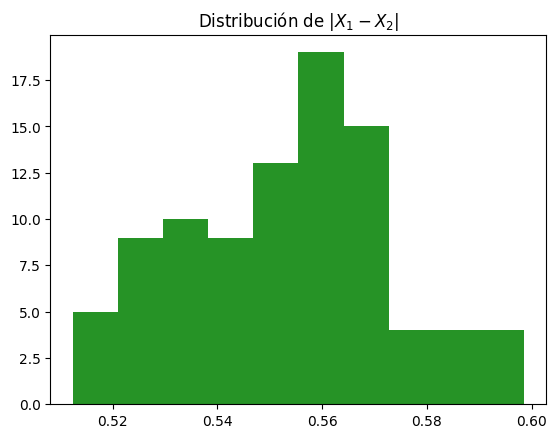

In [125]:
plt.hist(prob, color = 'g', alpha = 0.85)         # La gráfica nos sugiere que la distribución de |X1 - X2| aparentemente es normal.
plt.grid(False)
plt.title('Distribución de $|X_1 - X_2|$')
plt.show()

In [126]:
print('mu =', np.mean(prob), ', sigma =', np.std(prob))

mu = 0.5532459350574693 , sigma = 0.019811028876109398


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [127]:
mu = np.mean(prob)                                         # Se presenta el intervalos de confianza para la media estimada, de la
li = mu - norm.ppf(1-alpha/2) * np.std(prob)/np.sqrt(n)    #forma: 
ls = mu + norm.ppf(1-alpha/2) * np.std(prob)/np.sqrt(n)    #
print(li, '<', mu, '<', ls)                                #        Límite inferior < Media estimada < Límite superior

0.5522433770905759 < 0.5532459350574693 < 0.5542484930243627


## **8. Comparamos con la solución analítica.**

Se planteó que la diferencia absoluta $\,|X_1 - X_2|\,$ modela adecuadamente el sistema.

Para la resolución analítica de este problema, nos respaldaremos del trabajo de Cantor donde demuestra que existen infinitos más grandes que otros infinitos. También ignoraremos la naturaleza probabilística de los valores que pueden tomar $\,X_1\,$ y $\,X_2\,$, al ser estas totalmente equiprobables para ambas variables.

Ahora, se puede intuir que el resultado (número) $\,r\,$ que más se repetirá en $\,|X_1 - X_2|\,$ será $\,r = 0$, existiendo $\,\infty_0\,$ posibilidades para que salga.

Conforme van saliendo otros resultados mayores que cero, $\,r>0$, implica que se van "borrando" subintervalos de tamaño $\,r\,$ a través de todo el intervalo $\,[0,30]$, dejando así sólo $\,\infty_r\,$ posibilidades para el respectivo resultado. 

Se deduce que cada nuevo $\,\infty_r\,$ es menor que el anterior conforme $\,r\,$ incrementa, siendo $\,\infty_0\,$ el mayor de todos.

Todo esto se repite hasta llegar al resultado $\,r = 30$, el cual sólo tiene dos posibilidades: $\,\{X_{1,2} = \{0,30\}\colon X_1\neq X_2 \}$; por lo que este será el resultado que menos veces se repetirá.

Esta descripción del comportamiento de la distribución de los posibles resultados de $\,|X_1 - X_2|\,$ sugiere un aparente decrecimiento lineal de $\,\infty_r\,$ inversamente proporcional a $\,r\,$. Por lo tanto, $\,|X_1 - X_2|\,$ posee una distribución triangular con moda igual a $\,0\,$ y límites inferior y superior iguales a $\,0\,$ y $\,30\,$ respectivamente; es decir,

  \begin{align}
  |X_1 - X_2|\sim \mathrm{T}(0, 30, 0)
  \end{align}

Por lo tanto, siendo $\,c < 10 < b\,$, aplicamos la siguiente fórmula de la función de distribución acumulativa de la distribución triangular:

  \begin{align}
  P(|X_1 - X_2|\leq 10) = F(10) = 1 - \frac{(b - 10)^2}{(b - a)(b - c)} = 1 - \frac{20^2}{30^2} = \frac{5}{9} = 0.\bar{5} = 0.5555\ldots
  \end{align}

In [128]:
mu_ana = 5/9     # Solución analítica del problema.
print(mu_ana)    

0.5555555555555556


# **Solución**

In [129]:
print('La probabilidad estimada mediante simulación de que el tiempo que una de las dos personas llegue a esperar a la otra sea ')
print('como máximo 10 es del ' + str(mu*100) + '%.\n')
print('La cual difiere en un ' + str(np.abs(mu - mu_ana)*100 / mu_ana) + '% de la solución analítica.')

La probabilidad estimada mediante simulación de que el tiempo que una de las dos personas llegue a esperar a la otra sea 
como máximo 10 es del 55.32459350574693%.

La cual difiere en un 0.4157316896555252% de la solución analítica.
